Goal: 
- Create an analyse that will compute for each brain voxels the spinal level gave the maximal MI value (from C1 to C7)
- Each voxel will have the value of the segment: 1,2,3,4,5,6 or 7

## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [1]:
import sys,json
import glob, os
import matplotlib.pyplot as plt
project_dir="/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/2024_brsc_fc_project/"
sys.path.append(project_dir + "/code/")

from winner_take_all import WinnerAll
from plotting import Plot_brain

%matplotlib inline
%load_ext autoreload
%autoreload 2

## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization: Configuration & parameters

In [2]:
# Load config file ------------------------------------------------------------
with open('../config/05_brsc_seed2voxels.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified

GradMaps=WinnerAll(config,verbose=True) # initialize the function
PlotBr=Plot_brain(config) # initialize the function

Analyses will be run in the following mask: MNI_GM_2mm


## <font color=#B2D732> <span style="background-color: #4424D6"> Figure 2B | Winner-Take-All analysis within SMC

#### Run the analysis for each seed with the whole brain

In [3]:
tag="k7_wta_corr"
wta_f=GradMaps.compute_GradMaps(output_tag=tag,fwhm=[0,0,0],
                                redo=False,
                                verbose=True)

---------- Initialization info: 
icap_C1_gm will have a value of: 1
icap_C2_gm will have a value of: 2
icap_C3_gm will have a value of: 3
icap_C4_gm will have a value of: 4
icap_C5_gm will have a value of: 5
icap_C6_gm will have a value of: 6
icap_C7_gm will have a value of: 7


#### Mask the wta map with SMC mask (from iCAPs analysis) 

In [4]:
mask=project_dir + "/masks/brain/iCAPs_z_SMC_bin.nii.gz"
wta_smc_mask=[]
for smoothing in [None,[3,3,3]]:
    wta_smc_mask.append(GradMaps.mask_GradMaps(input_f=wta_f,
                                               mask=mask,
                                               output_tag="_SMC",
                                               smoothing_fwhm=smoothing,
                                               redo=False))


Number of voxels within the _SMC: 14343
Number of voxels within the _SMC: 14343


#### Plot the WTA map Figure 2B

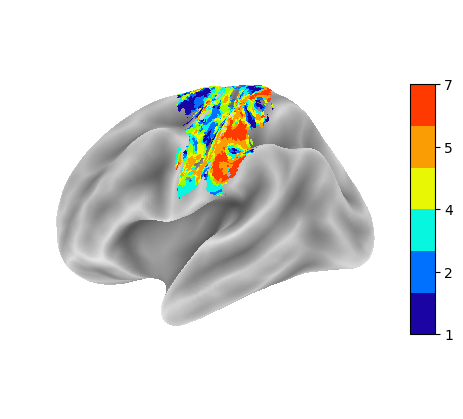

In [5]:
discretized_colormap=Plot_brain.plot_colormap(colors=["#1a04a4",'#0070ff','#07f6e0', "#9bff00",'#e8f703', '#fa9c03', '#ff3a00'],plot_colormap=False)
PlotBr.plot_3D(i_img=wta_smc_mask[1],
               hemi_view=["lh","rh"],
               face_view=["lateral"],
               vmin=1,vmax=7,
               mask_img=mask,
               threshold=0.9,
               colormap=discretized_colormap, 
               save_results=False)
plt.close()

## <font color=#B2D732> <span style="background-color: #4424D6"> Figure 2C | Assigned levels WTA maps

#### Threshold and combined cortical mask for assigned spinal segments - Figure 2C

In [6]:
thresholds=[[0.9,1.1],[1.9,2.1],[2.9,3.1],[3.9,4.1],[4.9,5.1],[5.9,6.1],[6.9,7.1]]
level_name=["_C1","_C2","_C3","_C4","_C5","_C6","_C7"]
level_masks=[]
for i, (threshold, level) in enumerate(zip(thresholds, level_name)):
    #print(f"Threshold: {threshold}, Level Name: {level}")
    level_masks.append(GradMaps.mask_GradMaps(input_f=wta_smc_mask[0],
                           mask=None,
                           output_tag=level,
                           threshold=threshold,
                           cluster_threshold=50, # two files will be supplied with and without cluster_threshold, useful for display purposes
                           smoothing_fwhm=None,
                           redo=None))
    
    
# Combine multiple levels together
levels_combined=["_C1C2","_C4C5","_C6C7"]
level_masks_combined=[]
for levels in levels_combined:
    i_files=[glob.glob(level_masks[0].split("_C1")[0] + "_" +levels[1:3] +level_masks[0].split("_C1")[1]), glob.glob(level_masks[0].split("_C1")[0] + "_" +levels[3:5] +level_masks[0].split("_C1")[1])]
    output_file=level_masks[0].split("_C1")[0] + levels +level_masks[0].split("_C1")[1] 
    
    level_masks_combined.append(GradMaps.combine_GradMaps(files=i_files, 
                     output_file=output_file,
                     redo=None,
                     verbose=True))  

Number of voxels within the _C1: 2622
Number of voxels within the _C2: 1753
Number of voxels within the _C3: 1808
Number of voxels within the _C4: 1079
Number of voxels within the _C5: 596
Number of voxels within the _C6: 1787
Number of voxels within the _C7: 2538


#### Plot the WTA map Figure 2C

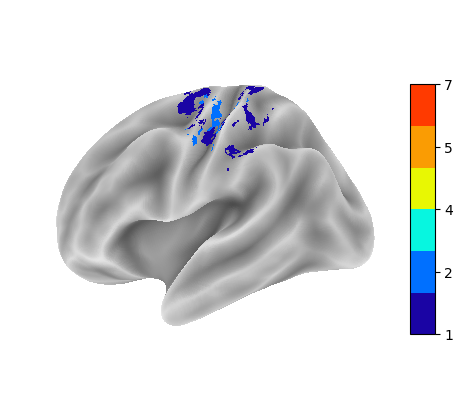

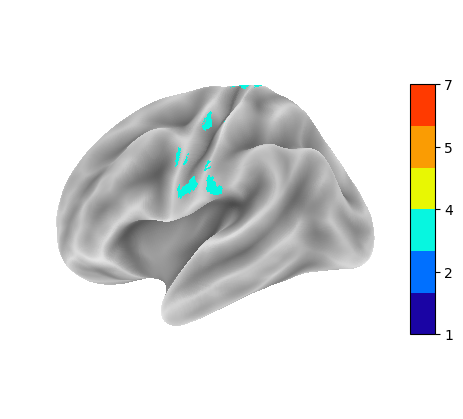

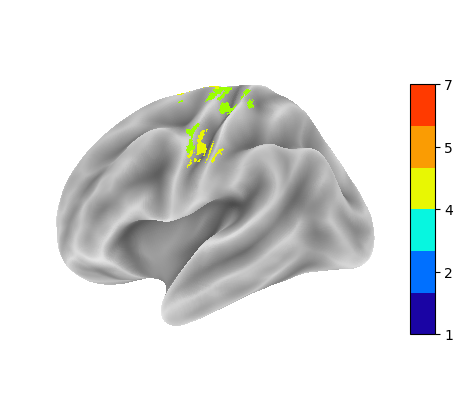

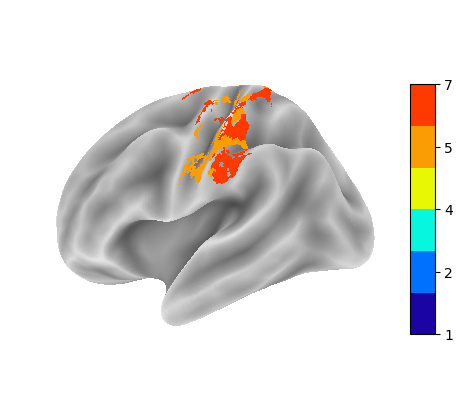

In [7]:
discretized_colormap=Plot_brain.plot_colormap(colors=["#1a04a4",'#0070ff','#07f6e0', "#9bff00",'#e8f703', '#fa9c03', '#ff3a00'],plot_colormap=False)
list_filename=[level_masks_combined[0], level_masks[2],level_masks_combined[1],level_masks_combined[2]]
for i,f in enumerate(list_filename):
    PlotBr.plot_3D(i_img=list_filename[i],
               hemi_view=["lh","rh"],
               face_view=["lateral"],
               vmin=1,vmax=7,
               mask_img=mask,
               threshold=0.9,
               colormap=discretized_colormap, 
               save_results=False)
    plt.close()

